<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/DiffractGPT_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[DiffractGPT: Atomic Structure Determination from X‑ray DiffractionPatterns Using a Generative Pretrained Transformer](https://pubs.acs.org/doi/epdf/10.1021/acs.jpclett.4c03137)

Author email: kchoudh2@jhu.edu



In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [1]:
%%time
import os
os.chdir('/content')
!rm -rf Software
os.makedirs('/content/Software')
os.chdir('/content/Software')
!pip install uv
if not os.path.exists('atomgpt'):
  !rm -rf atomgpt
  !git clone https://github.com/atomgptlab/atomgpt.git
  os.chdir('atomgpt')
  ! git checkout develop
  !uv pip install -q -e .



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 153.7 MB/s eta 0:00:00
Cloning into 'atomgpt'...
remote: Enumerating objects: 1383, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 1383 (delta 72), reused 78 (delta 61), pack-reused 1282 (from 1)
Receiving objects: 100% (1383/1383), 67.16 MiB | 50.20 MiB/s, done.
Resolving deltas: 100% (784/784), done.
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
CPU times: user 1.26 s, sys: 71.5 ms, total: 1.33 s
Wall time: 1min 9s


In [2]:
# Check imports
import atomgpt
import os
os.environ.pop('MPLBACKEND', None)  # Remove the invalid backend
import matplotlib
matplotlib.use('Agg')  # Use a compatible backend
import matplotlib.pyplot as plt



In [3]:
!pip install -q triton==3.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 31.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.7.0 requires triton==3.3.0; platform_system == "Linux" and platform_machine == "x86_64", but you have triton 3.2.0 which is incompatible.
atomgpt 2025.5.7 requires triton==3.3.0, but you have triton 3.2.0 which is incompatible.


# Inference Example for LaB6


| Argument        | Description |
|----------------|-------------|
| `--model_name` | HuggingFace-compatible model ID for the pretrained DiffractGPT model. Example: `knc6/diffractgpt_mistral_chemical_formula`. |
| `--formula`    | The chemical formula for which the XRD pattern will be generated. Example: `LaB6`. |
| `--dat_path`   | Output path for the generated `.dat` file. The file contains two columns: 2θ (angle) and intensity. |
| `--config_path`| Path to a JSON config file containing generation parameters (use the example file). |


In [4]:
%%time
!python atomgpt/inverse_models/inverse_predict.py --model_name knc6/diffractgpt_mistral_chemical_formula --formula LaB6 --dat_path atomgpt/examples/inverse_model_multi/my_data.dat --config_path atomgpt/examples/inverse_model_multi/config.json

args.config_path atomgpt/examples/inverse_model_multi/config.json
config_path atomgpt/examples/inverse_model_multi/config.json
config used atomgpt/examples/inverse_model_multi/config.json
config used {'id_prop_path': 'atomgpt/examples/inverse_model_multi/id_prop.csv', 'prefix': 'atomgpt_run', 'model_name': 'knc6/diffractgpt_mistral_chemical_formula', 'batch_size': 2, 'num_epochs': 2, 'logging_steps': 1, 'dataset_num_proc': 2, 'seed_val': 3407, 'learning_rate': 0.0002, 'per_device_train_batch_size': 2, 'gradient_accumulation_steps': 4, 'test_ratio': 0.4, 'model_save_path': 'lora_model_difractgpt', 'loss_type': 'default', 'optim': 'adamw_8bit', 'lr_scheduler_type': 'linear', 'output_dir': 'outputs_xrd', 'csv_out': 'AI-AtomGen-prop-dft_3d-test-rmse.csv', 'chem_info': 'formula', 'max_seq_length': 2048, 'prop': 'XRD', 'dtype': None, 'load_in_4bit': True, 'instruction': 'Below is a description of a material.', 'alpaca_prompt': '### Instruction:\n{}\n### Input:\n{}\n### Output:\n{}', 'output_

Let's visualize the structure

In [5]:
from jarvis.io.vasp.inputs import Poscar
from ase.visualize import view

pos="""System
1.0
3.84 0.0 0.0
0.0 3.84 0.0
0.0 0.0 3.84
La B
1 6
direct
0.0 0.0 0.0 La
0.2 0.5 0.5 B
0.5 0.5 0.8 B
0.5 0.5 0.2 B
0.5 0.2 0.5 B
0.5 0.8 0.5 B
0.8 0.5 0.5 B
"""
atoms = Poscar.from_string(pos).atoms
view(atoms.make_supercell([2,2,2]).ase_converter(),viewer='x3d')

Training example



In [ ]:
!python atomgpt/inverse_models/inverse_models.py --config_name atomgpt/examples/inverse_model_multi/config.json


         _                   _____ _____ _______ 
    /\  | |                 / ____|  __ \__   __|
   /  \ | |_ ___  _ __ ___ | |  __| |__) | | |   
  / /\ \| __/ _ \| '_ ` _ \| | |_ |  ___/  | |   
 / ____ \ || (_) | | | | | | |__| | |      | |   
/_/    \_\__\___/|_| |_| |_|\_____|_|      |_|   
   
config_file atomgpt/examples/inverse_model_multi/config.json
/content/Software/atomgpt/atomgpt/inverse_models/inverse_models.py:343: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint.pprint(config.dict())
{'alpaca_prompt': '### Instruction:\n{}\n### Input:\n{}\n### Output:\n{}',
 'batch_size': 2,
 'callback_samples': 2,
 'chem_info': 'formula',
 'csv_out': 'AI-AtomGen-prop-dft_3d-test-rmse.csv',
 'dataset_num_proc': 2,
 'dtype': None,
 'file_format': 'poscar',
 'gradient_accumulation_steps': 4,
 'id_prop_path': 'at

In [ ]:
!ls -altr

total 92
drwxr-xr-x  3 root root  4096 Jul 10 13:24 ..
-rw-r--r--  1 root root  1878 Jul 10 13:24 LICENSE.rst
-rw-r--r--  1 root root  3078 Jul 10 13:24 .gitignore
drwxr-xr-x  3 root root  4096 Jul 10 13:24 .github
-rw-r--r--  1 root root    29 Jul 10 13:24 .coveragerc
-rw-r--r--  1 root root  1215 Jul 10 13:25 setup.py
-rw-r--r--  1 root root   197 Jul 10 13:25 setup.cfg
-rw-r--r--  1 root root  2160 Jul 10 13:25 requirements.txt
-rw-r--r--  1 root root  3887 Jul 10 13:25 environment.yml
-rw-r--r--  1 root root 13297 Jul 10 13:25 README.md
drwxr-xr-x  8 root root  4096 Jul 10 13:25 .git
drwxr-xr-x  2 root root  4096 Jul 10 13:25 atomgpt.egg-info
drwxr-xr-x 10 root root  4096 Jul 10 13:26 atomgpt
drwxr-xr-x  3 root root  4096 Jul 10 13:26 atomgpt_compiled_cache
drwxr-xr-x  4 root root  4096 Jul 10 13:29 huggingface_tokenizers_cache
-rw-r--r--  1 root root  2470 Jul 10 13:30 out_inv.json
drwxr-xr-x  3 root root  4096 Jul 10 13:37 outputs_xrd
drwxr-xr-x  2 root root  4096 Jul 10 13:37 lo

Inference

In [ ]:
# !python atomgpt/inverse_models/inverse_predict.py --output_dir outputs_xrd --pred_csv atomgpt/examples/inverse_model_multi/pred_list_inverse.csv

 If you want to use the original mode, here is an example

In [ ]:
!ls atomgpt/examples/inverse_model_multi/tmp

config.json  LaB6.dat  pred_list.csv


In [ ]:
!python atomgpt/inverse_models/inverse_predict.py --output_dir atomgpt/examples/inverse_model_multi/tmp  --pred_csv atomgpt/examples/inverse_model_multi/tmp/pred_list.csv

/usr/local/lib/python3.11/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ('settings_',)`.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_save_path" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ('settings_',)`.
  warnings.warn(
{'alpaca_prompt': '### Instruction:\n{}\n### Input:\n{}\n### Output:\n{}',
 'batch_size': 2,
 'chem_info': 'formula',
 'csv_out': 'AI-AtomGen-prop-dft_3d-test-rmse.csv',
 'dataset_num_proc': 2,
 'dtype': None,
 'file_format': 'poscar',
 'gradient_accumulation_steps': 4,
 'id_prop_path': 'atomgpt/examples/inverse_model_multi/id_prop.csv',
 'id_tag': 'id',
 'instruction': 'Below is a description of a material.',
 'learning_rate': 0

Extra blocks below, that might not be necessary

In [ ]:
# %time
# # !pip install  -q dgl -f https://data.dgl.ai/wheels/torch-2.1/cu121/repo.html
# # !pip install -q alignn
# !pip install -q atomgpt bitsandbytes ase


In [ ]:
! wget https://rruff.info/repository/sample_child_record_powder/by_minerals/Silicon__R050145-1__Powder__Xray_Data_XY_Processed__4415.txt -O tmp/Si.dat

In [ ]:
!python atomgpt/inverse_models/inverse_predict.py --output_dir tmp  --pred_csv tmp/pred_list.csv

In [ ]:
!pip install "numpy>2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignn 2024.4.20 requires numpy<2.0.0,>=1.19.5, but you have numpy 2.2.4 which is incompatible.
atomgpt 2024.11.30 requires numpy==1.26.4, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip show bitsandbytes

Name: bitsandbytes
Version: 0.43.1
Summary: k-bit optimizers and matrix multiplication routines.
Home-page: https://github.com/TimDettmers/bitsandbytes
Author: Tim Dettmers
Author-email: dettmers@cs.washington.edu
License: MIT
Location: /usr/local/lib/python3.11/site-packages
Requires: numpy, torch
Required-by: atomgpt


In [ ]:
!pip install "bitsandbytes==0.45.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: bitsandbytes
    Found existing installation: bitsandbytes 0.43.3
    Uninstalling bitsandbytes-0.43.3:
      Successfully uninstalled bitsandbytes-0.43.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
atomgpt 2024.11.30 requires bitsandbytes==0.43.1, but you have bitsandbytes 0.45.0 which is incompatible.
atomgpt 2024.11.30 requires numpy==1.26.4, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install "numpy==2.2.4"

In [ ]:
!pip uninstall bitsandbytes -y
!pip install bitsandbytes


Found existing installation: bitsandbytes 0.45.0
Uninstalling bitsandbytes-0.45.0:
  Successfully uninstalled bitsandbytes-0.45.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 57.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
atomgpt 2024.11.30 requires bitsandbytes==0.43.1, but you have bitsandbytes 0.45.3 which is incompatible.
atomgpt 2024.11.30 requires numpy==1.26.4, but you have numpy 2.2.4 which is incompatible.


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
model_id = "knc6/diffractgpt_mistral_chemical_formula"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


RuntimeError: Numpy is not available

In [ ]:
%%time
from jarvis.analysis.diffraction.xrd import XRD
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import get_jid_data
import numpy as np
import torch
from jarvis.core.lattice import Lattice
from matplotlib.gridspec import GridSpec
from sklearn.metrics import mean_absolute_error
from ase.visualize import view
import time
from scipy import stats
from ase.optimize.fire import FIRE
from ase.constraints import ExpCellFilter
from jarvis.io.vasp.inputs import Poscar
from jarvis.core.atoms import ase_to_atoms
import numpy as np
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

%matplotlib inline

# torch.cuda.is_available = lambda : False
device = "cuda" if torch.cuda.is_available() else "cpu"
alpaca_prompt = """Below is a description of a material..

### Instruction:
{}

### Input:
{}

### Output:
{}"""






def baseline_als(y, lam, p, niter=10):
    """ALS baseline correction to remove broad background trends."""
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L - 2))
    w = np.ones(L)
    for _ in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

# def recast_array(x_original, y_original, x_new, tol=0.1):
#     """Recast original spectrum onto a new grid, accumulating close values."""
#     x_original = np.array(x_original)
#     y_new = np.zeros_like(x_new, dtype=np.float64)

#     # Accumulate intensities for sharpness preservation
#     for x_val, y_val in zip(x_original, y_original):
#         closest_index = np.abs(x_new - x_val).argmin()
#         y_new[closest_index] += y_val

#     # Remove noise below tolerance level
#     y_new[y_new < tol] = 0
#     return x_new, y_new
def recast_array(
    x_original=[], y_original=[], x_new=np.arange(0, 90, 1), tol=0.1
):
    x_original = np.array(x_original)
    # Initialize the new y array with NaNs or a default value
    y_new = np.full_like(x_new, 0, dtype=np.float64)

    # Fill the corresponding bins
    for x_val, y_val in zip(x_original, y_original):
        closest_index = np.abs(
            x_new - x_val
        ).argmin()  # Find the closest x_new index
        y_new[closest_index] = y_val
    # y_new[y_new<tol]=0
    return x_new, y_new
def sharpen_peaks(y, sigma=0.5):
    """Sharpen peaks using a narrow Gaussian filter."""
    # Use a very small sigma to reduce peak broadening
    y_sharp = gaussian_filter1d(y, sigma=sigma, mode='constant')
    return y_sharp

def processed(x, y, x_range=[0, 90], intvl=0.1, sigma=.05,recast=True,tol=0.1,background_subs=True):
    """Process the spectrum: background removal and peak sharpening."""
    y = np.array(y,dtype='float')
    if background_subs:

      # 1. Baseline correction
      background = baseline_als(y, lam=10000, p=0.01)
      y_corrected = y - background
    else:
      y_corrected = y

    # 2. Normalize the corrected spectrum
    y_corrected = y_corrected / np.max(y_corrected)

    # 3. Generate new x-axis values
    x_new = np.arange(x_range[0], x_range[1], intvl)

    # 4. Recast the spectrum onto the new grid
    if recast:
       x_new, y_corrected = recast_array(x, y_corrected, x_new,tol=tol)



    # 5. Sharpen the peaks using Gaussian filtering
    y_sharp = sharpen_peaks(y_corrected, sigma=sigma)

    # 6. Final normalization
    if np.max(y_sharp) > 0:
        y_sharp = y_sharp / np.max(y_sharp)

    return x_new, y_sharp

def relax_atoms(
    atoms=None,
    calculator=None,
    fmax=0.05,
    nsteps=150,
    constant_volume=False,

):
    if calculator is None:
        return atoms

    t1 = time.time()
    ase_atoms = atoms.ase_converter()
    ase_atoms.calc = calculator

    ase_atoms = ExpCellFilter(ase_atoms, constant_volume=constant_volume)
    # TODO: Make it work with any other optimizer
    dyn = FIRE(ase_atoms)
    dyn.run(fmax=fmax, steps=nsteps)
    en = ase_atoms.atoms.get_potential_energy()
    final_atoms = ase_to_atoms(ase_atoms.atoms)
    t2 = time.time()
    return final_atoms

def text2atoms(response):
    print("response", response)
    if response.startswith("\n"):
        subs = 0
    else:
        subs = 1
    tmp_atoms_array = response.split("\n")
    lat_lengths = np.array(tmp_atoms_array[1 - subs].split(), dtype="float")
    lat_angles = np.array(tmp_atoms_array[2 - subs].split(), dtype="float")
    lat = Lattice.from_parameters(
        lat_lengths[0],
        lat_lengths[1],
        lat_lengths[2],
        lat_angles[0],
        lat_angles[1],
        lat_angles[2],
    )
    elements = []
    coords = []
    for ii, i in enumerate(tmp_atoms_array):
        if ii > 2 - subs and ii < len(tmp_atoms_array) - subs:

            tmp = i.split()
            if len(tmp) > 2:
                elements.append(tmp[0])
                coords.append([float(tmp[1]), float(tmp[2]), float(tmp[3])])
    atoms = Atoms(
        coords=coords,
        elements=elements,
        lattice_mat=lat.lattice(),
        cartesian=False,
    )
    return atoms

def gen_atoms(prompt="", max_new_tokens=1048, model="", tokenizer=""):
    tokens = tokenizer.tokenize(prompt)
    num_tokens = len(tokens)
    #print('prompt',prompt,num_tokens)

    inputs = tokenizer(
        [
            alpaca_prompt.format(
                "Below is a description of a material.",  # instruction
                prompt,  # input
                "",  # output - leave this blank for generation!
            )
        ],
        return_tensors="pt",
    ).to(device)
    outputs = model.generate(
        **inputs, max_new_tokens=max_new_tokens, use_cache=True
    )
    response = (
        tokenizer.batch_decode(outputs)[0].split("# Output:")[1].strip("</s>")
    )
    # print('response',response)
    atoms = text2atoms(response)
    return atoms



def smooth_xrd(atoms=None,thetas=[0, 90],intvl=0.5):
    a, b, c = XRD(thetas=thetas).simulate(atoms=atoms)
    a = np.array(a)
    c = np.array(c)
    c=c/np.max(c)
    a, c = recast_array(
        x_original=a,
        y_original=c,
        x_new=np.arange(thetas[0], thetas[1], intvl),
    )
    c=c/np.max(c)
    #c_str = "\n".join(["{0:.3f}".format(x) for x in c])
    c_str = "\n".join(["{0:.2f}".format(x) for x in c])

    return c_str,c

def main_spectra(spectra=[],formulas=[],model=None,tokenizer=None,calculator=None,device='cpu',max_new_tokens=500,intvl=0.3,thetas=[0, 90],filename=None,panels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q'],fmax=0.05,nsteps=150):
 the_grid = GridSpec(len(spectra),4)
 plt.rcParams.update({'font.size': 18})
 plt.figure(figsize=(16,4*len(spectra)))
 count=0
 for ii,cccc in enumerate(spectra):


    plt.subplot(the_grid[ ii,1])
    #plt.plot(cccc,label='Target')
    targ=spectra[ii][1]
    cccc=targ
    y_new_str=spectra[ii][0]
    # atoms1 = Atoms.from_dict(
    #     get_jid_data(jid=filename, dataset="dft_3d")["atoms"]
    # )
    # y_new_str,cccc = smooth_xrd(atoms=atoms1,intvl=0.3)

    title="("+panels[count]+") "+"Input XRD"
    count+=1
    plt.title(title)

    plt.plot(cccc,c='red')
    plt.ylim([-0.02,1])
    plt.xticks([0,150,300],[0,45,90])
    plt.xlabel(r"$2\theta$")
    plt.tight_layout()
    formula = formulas[ii] #atoms1.composition.reduced_formula

    info = {}
    info["instruction"] = "Below is a description of a material."
    info["input"] = (
        "The chemical formula is "
        + formula
        # + " The  "
        +" The  "
        + "XRD"
        # "The chemical elements are "
        # + Composition.from_string(formula).search_string
        + " is "
        + y_new_str
        + "."
        + " Generate atomic structure description with lattice lengths, angles, coordinates and atom types."
    )
    # print(info)
    atoms = gen_atoms(
        prompt=info["input"],
        model=model,
        tokenizer=tokenizer,
        max_new_tokens=max_new_tokens,
    )
    print(atoms)
    plt.subplot(the_grid[ii,2])
    y_new_str,cccc = smooth_xrd(atoms=atoms,intvl=intvl,thetas=thetas)
    # x, d_hkls1, y = XRD().simulate(atoms=optim)
    # y=np.array(y)/max(y)
    #plt.bar(x,y,label='DiffractGPT+ALIGNN-FF')
    #mae=round(stats.pearsonr(targ, cccc)[0], 2) #
    mae= round(mean_absolute_error(targ,cccc),3)
    #plt.title('DiffractGPT'+str(mae))
    plt.plot(cccc,c='blue')
    plt.xticks([0,150,300],[0,45,90])
    plt.ylim([-0.02,1])

    plt.xlabel(r"$2\theta$")
    plt.tight_layout()
    title="("+panels[count]+") "+"DGPT" +" ("+str(mae)+")"
    count+=1
    plt.title(title)
    # plt.legend()
    # from alignn.ff.ff import AlignnAtomwiseCalculator
    # calculator = AlignnAtomwiseCalculator()
    calculator=None
    optim=relax_atoms(atoms=atoms,calculator=calculator,fmax=fmax,nsteps=nsteps)

    # x, d_hkls1, y = XRD().simulate(atoms=atoms1)
    # y=np.array(y)/max(y)
    #plt.bar(x,y,label='Target')





    plt.subplot(the_grid[ii,3])
    y_new_str,cccc = smooth_xrd(atoms=optim,intvl=intvl,thetas=thetas)
    # x, d_hkls1, y = XRD().simulate(atoms=optim)
    # y=np.array(y)/max(y)
    #plt.bar(x,y,label='DiffractGPT+ALIGNN-FF')
    #mae=round(stats.pearsonr(targ, cccc)[0], 2)
    mae=round(mean_absolute_error(targ,cccc),3)
    #plt.title('DiffractGPT-A'+str(mae))
    plt.plot(cccc,c='green')
    plt.xticks([0,150,300],[0,45,90])
    plt.xlabel(r"$2\theta$")
    plt.ylim([-0.02,1])

    title="("+panels[count]+") "+"DGPT+AFF" +" ("+str(mae)+")"
    count+=1
    plt.title(title)
    plt.tight_layout()
 if filename is not None:
        plt.savefig(filename)
        plt.close()
    #plt.xlim([0,90])
    #plt.legend()




CPU times: user 918 µs, sys: 0 ns, total: 918 µs
Wall time: 920 µs


Currently I have disabled MLFF optimization, will be available soon

response 
4.47 4.47 4.47
90 90 90
La 0.000 0.000 0.000
B 0.500 0.500 0.166
B 0.500 0.500 0.834
B 0.500 0.166 0.500
B 0.500 0.834 0.500
B 0.166 0.500 0.500
B 0.834 0.500 0.500
System
1.0
4.47 0.0 0.0
-0.0 4.47 0.0
0.0 0.0 4.47
La B 
1 6 
direct
0.0 0.0 0.0 La
0.5 0.5 0.166 B
0.5 0.5 0.834 B
0.5 0.166 0.5 B
0.5 0.834 0.5 B
0.166 0.5 0.5 B
0.834 0.5 0.5 B

CPU times: user 24.5 s, sys: 4.02 s, total: 28.5 s
Wall time: 28.9 s


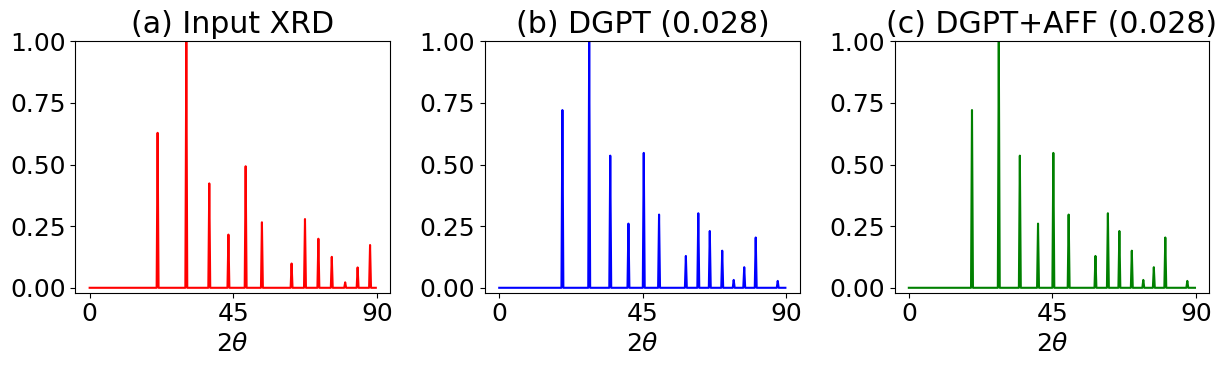

In [ ]:
%%time
# https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-19821.xml
from jarvis.io.vasp.inputs import Poscar
pos="""LaB6
1.0
4.154998579020728 0.0 0.0
0.0 4.154998579020728 -0.0
0.0 0.0 4.154998579020728
La B
1 6
Cartesian
0.0 0.0 0.0
3.3248945674454897 2.0775 2.0775
0.8301054325545105 2.0775 2.0775
2.0775 2.0775 3.3248945674454897
2.0775 2.0775 0.8301054325545105
2.0775 0.8301054325545105 2.0775
2.0775 3.3248945674454897 2.0775
"""
atoms=Poscar.from_string(pos).atoms
y_new_str,cccc = smooth_xrd(atoms=atoms,intvl=0.3,thetas=[0,90])
main_spectra(model=model,spectra=[[y_new_str,cccc]],formulas=["LaB6"],tokenizer=tokenizer,filename=None,calculator=None)

response 
4.30 4.30 4.30
60 60 60
Si 0.000 0.000 0.000
Si 0.250 0.250 0.250
System
1.0
3.72391 0.0 2.15
1.2413 3.51094 2.15
0.0 0.0 4.3
Si 
2 
direct
0.0 0.0 0.0 Si
0.25 0.25 0.25 Si

CPU times: user 13.7 s, sys: 4.76 s, total: 18.5 s
Wall time: 18.7 s


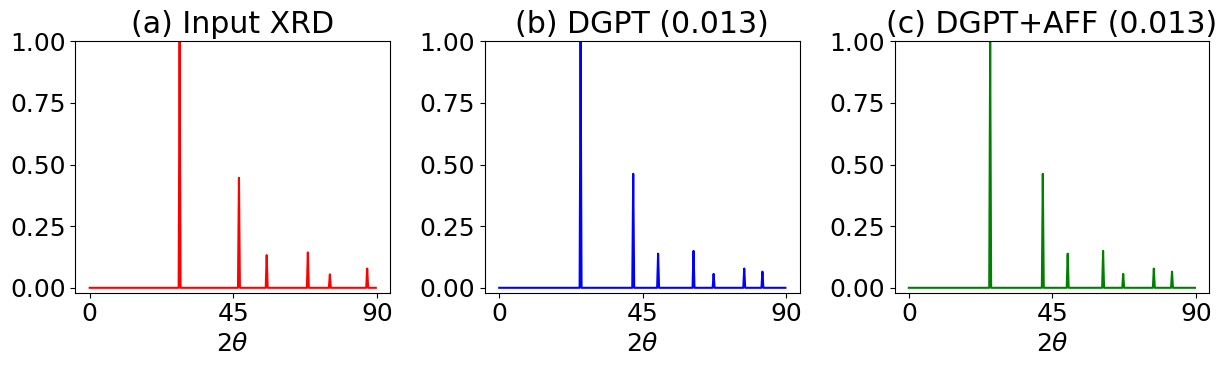

In [ ]:
%%time
# https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-1002.xml
from jarvis.io.vasp.inputs import Poscar
pos="""Si2
1.0
3.3641499856336465 -2.5027128e-09 1.94229273881412
1.121382991333525 3.1717517190189715 1.9422927388141193
-2.5909987e-09 -1.8321133e-09 3.884586486670313
Si
2
Cartesian
3.92483875 2.77528125 6.7980237500000005
0.56069125 0.39646875 0.9711462500000001
"""
atoms=Poscar.from_string(pos).atoms
y_new_str,cccc = smooth_xrd(atoms=atoms,intvl=0.3,thetas=[0,90])
main_spectra(model=model,spectra=[[y_new_str,cccc]],formulas=["Si"],tokenizer=tokenizer,filename=None,calculator=None)